In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset

In [2]:
df = pd.read_csv('C:/Users/Александр/Python/myenv/Lib/site-packages/parso/python/transaction.csv')

In [3]:
df.head()

,trDte,bcode,clientID,item,itemGroup,quantity,amount
0,01.09.2017,code000000001,client13166,sku8444,Скобяные изделия,1,29
1,01.09.2017,code000000001,client13166,sku12545,Оборудование для сада и дачи,1,329
2,01.09.2017,code000000001,client13166,sku3391,Инструменты,1,169
3,01.09.2017,code000000001,client13166,sku20444,Инструменты,2,578
4,01.09.2017,code000000002,client1239,sku29959,Скобяные изделия,1,329


In [4]:
df.describe()

,quantity,amount
count,1.008688e+06,1.008688e+06
mean,2.222474e+00,6.231940e+02
std,5.029007e+00,1.878421e+03
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,5.600000e+01
50%,1.000000e+00,1.500000e+02
75%,2.000000e+00,4.250000e+02
max,1.100000e+03,2.131770e+05


In [5]:
#Группирвока по товару и подсчет количества и суммы

grouped = df.groupby('item').agg(
    total_quantity=('quantity', 'sum'),
    total_amount=('amount', 'sum')
).reset_index()
grouped

,item,total_quantity,total_amount
0,sku1,11,405
1,sku10,10,17350
2,sku100,162,47010
3,sku1000,104,1717
4,sku10000,77,7447
...,...,...,...
30561,sku9995,24,47400
30562,sku9996,2,238
30563,sku9997,5,827
30564,sku9998,2419,130354


In [6]:
# Сортировка по сумме и вывод ТОП-X
x = int(input())
grouped.sort_values('total_amount', ascending=False).iloc[:x]


,item,total_quantity,total_amount
17951,sku26161,18902,5373638
9108,sku18199,7250,3951361
13270,sku21947,15304,3918570
20133,sku28128,7705,3027786
28728,sku8342,3512,2113158


In [7]:
df['trDte'] = pd.to_datetime(df['trDte'], errors='coerce')
#Данные за последние 6 месяцев
end_date = '2019-10-31'
period_months = 6
start_date = pd.to_datetime(end_date)-pd.DateOffset(months = period_months)

last_six_months = df[(df['trDte'] >= start_date) & (df['trDte'] <= pd.to_datetime(end_date))]

#Группировка и вывод ТОПа
last_six_months = last_six_months.groupby('item').agg(
    total_quantity=('quantity', 'sum'),
    total_amount=('amount', 'sum')
).reset_index()
last_six_months.sort_values('total_amount', ascending=False).iloc[:10].reset_index()

,index,item,total_quantity,total_amount
0,9958,sku26161,2091,599307
1,16001,sku8342,721,446680
2,5055,sku18199,771,423456
3,7350,sku21947,1362,356949
4,7518,sku22208,26,260281
5,10978,sku27791,1308,242023
6,11192,sku28128,582,231012
7,14777,sku6420,1981,218095
8,11687,sku28905,309,215339
9,9678,sku25704,348,213894


In [8]:
# Группировка по клиентам
clients = df.groupby('clientID').agg(
    total_quantity=('quantity', 'sum'),
    total_amount=('amount', 'sum'),
    visit_count = ('trDte', 'nunique')
)
client_stats = clients.sort_values('total_amount', ascending = False)
client_stats.agg({
    'total_quantity':['min','max', 'mean','median'],
    'total_amount': ['min','max', 'mean','median'],
    'visit_count': ['min','max', 'mean']})

,total_quantity,total_amount,visit_count
min,1.000000,1.000000e+01,0.000000
max,5457.000000,3.887309e+06,72.000000
mean,52.444275,1.470566e+04,2.397394
median,21.000000,6.410000e+03,NaN


In [9]:
#Экстремальные клиенты
extremal_clients = client_stats[(client_stats['total_quantity']>=2000) | (client_stats['total_amount']>=500000)]
print(extremal_clients.count())
print(extremal_clients)

total_quantity    9
total_amount      9
visit_count       9
dtype: int64
             total_quantity  total_amount  visit_count
clientID                                              
client29182            3434       3887309           36
client15654            5457       1443255           64
client8778             1617        986618            5
client1704             1187        636101            4
client33032            1255        537397           34
client37582            2526        502515           64
client30977            2234        407138           44
client34081            2470        386355           55
client20310            3265        366035           36


In [10]:
single_visit_clients = clients[clients['visit_count'] == 1]
num_single_visitors = len(single_visit_clients)
print(f"Количество клиентов с одним визитом: {num_single_visitors}")

avg_check = single_visit_clients['total_amount'].mean()
avg_volume = single_visit_clients['total_quantity'].mean()
print(f"Средний чек: {avg_check:.2f}")
print(f"Средний объём покупок: {avg_volume:.2f}")



Количество клиентов с одним визитом: 12292
Средний чек: 7388.34
Средний объём покупок: 21.94


In [ ]:
zero_quantity = df[df['quantity'] == 0] 
if len(zero_quantity)>0:
    df = df[df['quantity'] != 0]
else:
    print('Все строки имеют quantity > 0, удаление не требуется')

df['price'] = df['amount'] / df['quantity']
price_min = df['price'].min()
price_max = df['price'].max()
price_mean = df['price'].mean()
price_median = df['price'].median()
print("\nСтатистика по столбцу 'price':")
print(f"Минимальная цена: {price_min:.2f}")
print(f"Максимальная цена: {price_max:.2f}")
print(f"Средняя цена: {price_mean:.2f}")
print(f"Медианная цена: {price_median:.2f}")
print("\nПервые 10 строк с новым столбцом 'price':")
print(df.head(10))

Все строки имеют quantity > 0, удаление не требуется

Статистика по столбцу 'price':
Минимальная цена: 0.00
Максимальная цена: 119500.00
Средняя цена: 389.78
Медианная цена: 102.89

Первые 10 строк с новым столбцом 'price':
       trDte          bcode     clientID      item  \
0 2017-01-09  code000000001  client13166   sku8444   
1 2017-01-09  code000000001  client13166  sku12545   
2 2017-01-09  code000000001  client13166   sku3391   
3 2017-01-09  code000000001  client13166  sku20444   
4 2017-01-09  code000000002   client1239  sku29959   
5 2017-01-09  code000000002   client1239  sku19394   
6 2017-01-09  code000000002   client1239   sku9916   
7 2017-01-09  code000000002   client1239  sku27003   
8 2017-01-09  code000000002   client1239  sku15395   
9 2017-01-09  code000000002   client1239  sku25185   

                      itemGroup  quantity  amount  price  
0              Скобяные изделия         1      29   29.0  
1  Оборудование для сада и дачи         1     329  329.0  
2   

In [20]:
price = df['price']
Q1 = price.quantile(0.25)
Q2 = price.quantile(0.50)  # медиана
Q3 = price.quantile(0.75)
IQR = Q3 - Q1

min_price = price.min()
max_price = price.max()

print("Описательная статистика по столбцу 'price':")
print(f"Минимум: {min_price:.2f}")
print(f"25% (Q1): {Q1:.2f}")
print(f"50% (Q2 / медиана): {Q2:.2f}")
print(f"75% (Q3): {Q3:.2f}")
print(f"Максимум: {max_price:.2f}")
print(f"Межквартильный диапазон (IQR): {IQR:.2f}")

Описательная статистика по столбцу 'price':
Минимум: 0.00
25% (Q1): 39.00
50% (Q2 / медиана): 102.89
75% (Q3): 269.00
Максимум: 119500.00
Межквартильный диапазон (IQR): 230.00


In [21]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nГраницы выбросов:")
print(f"Нижняя граница (lower_bound): {lower_bound:.2f}")
print(f"Верхняя граница (upper_bound): {upper_bound:.2f}")


Границы выбросов:
Нижняя граница (lower_bound): -306.00
Верхняя граница (upper_bound): 614.00


In [22]:
outliers = df[(price < lower_bound) | (price > upper_bound)]
num_outliers = len(outliers)

print(f"\nКоличество выбросов: {num_outliers}")


Количество выбросов: 112596


In [23]:
print(f"\n10 самых дешёвых выбросов:")
print(outliers.sort_values(by='price').head(10)[['price']])

print(f"\n10 самых дорогих выбросов:")
print(outliers.sort_values(by='price', ascending=False).head(10)[['price']])


10 самых дешёвых выбросов:
             price
393100  614.142857
393099  614.166667
499700  614.500000
560204  614.500000
693758  614.666667
353878  614.666667
643756  614.750000
867779  614.800000
476533  614.833333
906730  614.833333

10 самых дорогих выбросов:
           price
734936  119500.0
242769   76990.0
847552   74990.0
153014   74990.0
713368   71991.0
766446   71241.0
704822   71241.0
222969   69990.0
624879   69990.0
753313   69741.0


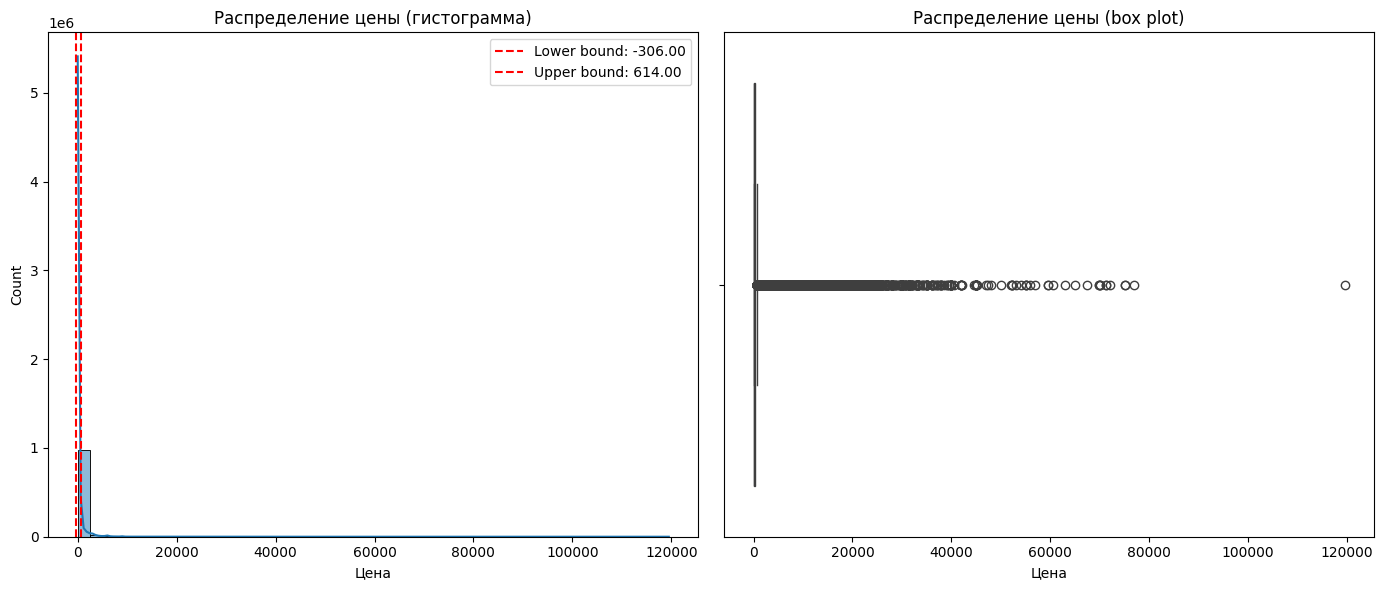

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма
sns.histplot(df['price'], bins=50, kde=True, ax=axes[0])
axes[0].axvline(lower_bound, color='r', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
axes[0].axvline(upper_bound, color='r', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
axes[0].set_title('Распределение цены (гистограмма)')
axes[0].set_xlabel('Цена')
axes[0].legend()

# Box plot
sns.boxplot(x=df['price'], ax=axes[1])
axes[1].set_title('Распределение цены (box plot)')
axes[1].set_xlabel('Цена')

plt.tight_layout()
plt.show()

In [ ]:
sales_by_item = df.groupby('item', as_index=False)['amount'].sum()

# 2. Отсортируй товары по сумме продаж в порядке убывания
sales_by_item = sales_by_item.sort_values(by='amount', ascending=False).reset_index(drop=True)
total_sum = sales_by_item['amount'].sum()
sales_by_item['cumulative_sum'] = sales_by_item['amount'].cumsum()
sales_by_item['cumulative_pct'] = (sales_by_item['cumulative_sum'] / total_sum) * 100

In [28]:
total_sum = sales_by_item['amount'].sum()
sales_by_item['cumulative_sum'] = sales_by_item['amount'].cumsum()
sales_by_item['cumulative_pct'] = (sales_by_item['cumulative_sum'] / total_sum) * 100

In [30]:
def assign_abc_group(cum_pct):
    if cum_pct <= 80:
        return 'A'
    elif cum_pct <= 95:
        return 'B'
    else:
        return 'C'

sales_by_item['ABC_group'] = sales_by_item['cumulative_pct'].apply(assign_abc_group)

In [31]:
group_counts = sales_by_item['ABC_group'].value_counts().sort_index()
print("Количество товаров в каждой группе:")
print(group_counts)

print("\nПримеры товаров из группы A (ТОП-10):")
print(sales_by_item[sales_by_item['ABC_group'] == 'A'][['item', 'amount']].head(10))

print("\nПримеры товаров из группы B (ТОП-10):")
print(sales_by_item[sales_by_item['ABC_group'] == 'B'][['item', 'amount']].head(10))

print("\nПримеры товаров из группы C (ТОП-10):")
print(sales_by_item[sales_by_item['ABC_group'] == 'C'][['item', 'amount']].head(10))

Количество товаров в каждой группе:
ABC_group
A     5353
B     8234
C    16979
Name: count, dtype: int64

Примеры товаров из группы A (ТОП-10):
       item   amount
0  sku26161  5373638
1  sku18199  3951361
2  sku21947  3918570
3  sku28128  3027786
4   sku8342  2113158
5  sku29626  1973964
6   sku9018  1706341
7   sku9471  1675843
8  sku25074  1668585
9  sku27791  1645042

Примеры товаров из группы B (ТОП-10):
          item  amount
5353  sku10822   22836
5354  sku10724   22834
5355  sku29015   22826
5356  sku26094   22824
5357  sku19581   22817
5358  sku28254   22817
5359  sku10592   22812
5360  sku24731   22808
5361  sku12995   22797
5362    sku630   22796

Примеры товаров из группы C (ТОП-10):
           item  amount
13587  sku18189    5357
13588  sku13438    5357
13589    sku872    5357
13590   sku8935    5355
13591   sku5421    5355
13592  sku21154    5355
13593  sku10928    5354
13594  sku23347    5354
13595  sku16132    5354
13596  sku16386    5353


In [33]:
# 1. Сгруппируем данные по 'item' и посчитаем среднее и стандартное отклонение количества
xyz_data = df.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()

# 2. Заменим NaN в std (если у товара только одна продажа — std = NaN)
xyz_data['std'] = xyz_data['std'].fillna(0)

# 3. Рассчитаем коэффициент вариации (CV) в процентах
xyz_data['CV'] = (xyz_data['std'] / xyz_data['mean']) * 100

# Обработаем случаи, где mean = 0 (на всякий случай)
xyz_data['CV'] = xyz_data['CV'].replace([float('inf'), -float('inf')], 100)

# 4. Присвоим группу X, Y, Z
def assign_xyz_group(cv):
    if cv < 15:
        return 'X'
    elif 15 <= cv <= 25:
        return 'Y'
    else:
        return 'Z'

xyz_data['XYZ_group'] = xyz_data['CV'].apply(assign_xyz_group)

# 5. Выведем количество товаров в каждой группе
group_counts_xyz = xyz_data['XYZ_group'].value_counts().sort_index()  # X → Y → Z
print("Количество товаров по XYZ-группам:")
print(group_counts_xyz)
# 6. Покажем итоговый датафрейм
print("\nИтоговый датафрейм XYZ-анализа (первые 10 строк):")
print(xyz_data[['item', 'mean', 'std', 'CV', 'XYZ_group']].round(2).head(10))

Количество товаров по XYZ-группам:
XYZ_group
X    11655
Y     1354
Z    17557
Name: count, dtype: int64

Итоговый датафрейм XYZ-анализа (первые 10 строк):
       item  mean   std      CV XYZ_group
0      sku1  1.38  0.52   37.64         Z
1     sku10  2.00  1.22   61.24         Z
2    sku100  1.40  0.88   63.26         Z
3   sku1000  1.27  0.67   52.64         Z
4  sku10000  2.48  2.91  117.09         Z
5  sku10001  2.00  2.41  120.42         Z
6  sku10002  1.00  0.00    0.00         X
7  sku10003  1.00  0.00    0.00         X
8  sku10004  4.33  6.22  143.50         Z
9  sku10005  1.00  0.00    0.00         X


In [34]:
# 1. Объединяем данные ABC и XYZ по 'item'
abc_xyz_merge = sales_by_item[['item', 'ABC_group']].merge(
    xyz_data[['item', 'XYZ_group']], 
    on='item', 
    how='inner'  # только товары, присутствующие в обоих анализах
)

# 2. Создаём сводную таблицу (pivot table) — подсчёт количества товаров в каждой ячейке
abc_xyz_matrix = pd.pivot_table(
    abc_xyz_merge,
    index='ABC_group',   # строки
    columns='XYZ_group', # столбцы
    values='item',
    aggfunc='count',     # считаем количество товаров
    fill_value=0         # заменяем NaN на 0
)

# 3. Сортируем индексы, чтобы было A → B → C и X → Y → Z
abc_xyz_matrix = abc_xyz_matrix.reindex(index=['A', 'B', 'C'], columns=['X', 'Y', 'Z'], fill_value=0)

# 4. Выводим матрицу
print("Матрица ABC-XYZ (количество товаров в каждой группе):")
print(abc_xyz_matrix)

Матрица ABC-XYZ (количество товаров в каждой группе):
XYZ_group     X    Y     Z
ABC_group                 
A          1527  297  3529
B          2562  411  5261
C          7566  646  8767


In [43]:
def abc_xyz_analysis(df, abc_threshold_a=80, abc_threshold_b=95):
    """
    Выполняет ABC-XYZ анализ и возвращает DataFrame с комбинированными группами.
    
    Параметры:
    - df: DataFrame с колонками 'item', 'amount', 'quantity', 'visit_date' (если нужно)
    - abc_threshold_a: граница для группы A (по умолчанию 80%)
    - abc_threshold_b: граница для группы B (по умолчанию 95%)
    
    Возвращает:
    - DataFrame с колонками: item, ABC_group, XYZ_group, combined_group
    """
    
    # ABC-анализ по сумме продаж (amount)
    abc_data = df.groupby('item', as_index=False)['amount'].sum()
    abc_data = abc_data.sort_values(by='amount', ascending=False).reset_index(drop=True)
    
    total_amount = abc_data['amount'].sum()
    abc_data['cumulative_sum'] = abc_data['amount'].cumsum()
    abc_data['cumulative_pct'] = (abc_data['cumulative_sum'] / total_amount) * 100

    def assign_abc_group(pct):
        if pct <= abc_threshold_a:
            return 'A'
        elif pct <= abc_threshold_b:
            return 'B'
        else:
            return 'C'
    
    abc_data['ABC_group'] = abc_data['cumulative_pct'].apply(assign_abc_group)
    
    # XYZ-анализ по стабильности количества (quantity)
    xyz_data = df.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()
    xyz_data['std'] = xyz_data['std'].fillna(0)
    xyz_data['CV'] = (xyz_data['std'] / xyz_data['mean']) * 100
    xyz_data['CV'] = xyz_data['CV'].replace([np.inf, -np.inf], 100)  # обработка деления на 0

    def assign_xyz_group(cv):
        if cv < 15:
            return 'X'
        elif 15 <= cv <= 25:
            return 'Y'
        else:
            return 'Z'
    
    xyz_data['XYZ_group'] = xyz_data['CV'].apply(assign_xyz_group)
    
    # Объединяем ABC и XYZ
    result = abc_data[['item', 'ABC_group']].merge(
        xyz_data[['item', 'XYZ_group']],
        on='item',
        how='inner'
    )
    
    # Комбинированная группа (например, 'AX', 'BZ')
    result['combined_group'] = result['ABC_group'] + result['XYZ_group']
    
    return result

In [44]:
# Убедимся, что visit_date — в формате datetime
df['trDte'] = pd.to_datetime(df['trDte'])

# Фильтруем данные
start_date = '2019-05-01'
end_date = '2019-10-31'
df_last_6m = df[
    (df['trDte'] >= start_date) &
    (df['trDte'] <= end_date)
].copy()

print(f"Всего транзакций за 6 месяцев: {len(df_last_6m)}")
print(f"Количество уникальных товаров: {df_last_6m['item'].nunique()}")

Всего транзакций за 6 месяцев: 105958
Количество уникальных товаров: 17012


In [48]:
# Полный период
full_analysis = abc_xyz_analysis(df)

# Последние 6 месяцев
recent_analysis = abc_xyz_analysis(df_last_6m)

# Объединяем по 'item', чтобы сравнить группы
comparison = full_analysis.merge(
    recent_analysis,
    on='item',
    how='inner',
    suffixes=('_full', '_recent')
)

# Выделяем, кто изменил комбинированную группу
comparison['changed'] = comparison['combined_group_full'] != comparison['combined_group_recent']

print(f"Всего товаров в обоих периодах: {len(comparison)}")
print(f"Товаров, сменивших группу: {comparison['changed'].sum()}")

Всего товаров в обоих периодах: 17012
Товаров, сменивших группу: 9394


In [49]:
# Товары, которые стали важнее (пример улучшения: C → A, B → A и т.д.)
# Простая логика: сравним только ABC (можно усложнить — учитывать XYZ)
abc_rank = {'A': 3, 'B': 2, 'C': 1}
comparison['abc_rank_full'] = comparison['ABC_group_full'].map(abc_rank)
comparison['abc_rank_recent'] = comparison['ABC_group_recent'].map(abc_rank)
comparison['improved'] = comparison['abc_rank_recent'] > comparison['abc_rank_full']
comparison['declined'] = comparison['abc_rank_recent'] < comparison['abc_rank_full']

print(f"\nТовары, которые стали важнее (ABC):")
print(comparison[comparison['improved']][['item', 'ABC_group_full', 'ABC_group_recent']].head(10))

print(f"\nТовары, которые стали менее важны (ABC):")
print(comparison[comparison['declined']][['item', 'ABC_group_full', 'ABC_group_recent']].head(10))


Товары, которые стали важнее (ABC):
          item ABC_group_full ABC_group_recent
3993  sku10724              B                A
3998  sku20372              B                A
3999  sku13243              B                A
4003  sku11805              B                A
4005   sku8546              B                A
4006  sku21059              B                A
4010  sku26001              B                A
4012  sku17242              B                A
4013  sku12051              B                A
4014  sku23549              B                A

Товары, которые стали менее важны (ABC):
         item ABC_group_full ABC_group_recent
9    sku18190              A                C
196  sku25902              A                B
270   sku6216              A                B
421  sku24899              A                B
463  sku26165              A                B
488   sku5361              A                B
502  sku13210              A                C
517  sku13552              A        

In [50]:
# Матрица: весь период
matrix_full = pd.crosstab(comparison['ABC_group_full'], comparison['XYZ_group_full'])
matrix_recent = pd.crosstab(comparison['ABC_group_recent'], comparison['XYZ_group_recent'])

print("\nМатрица ABC-XYZ — весь период:")
print(matrix_full)

print("\nМатрица ABC-XYZ — последние 6 месяцев:")
print(matrix_recent)


Матрица ABC-XYZ — весь период:
XYZ_group_full     X    Y     Z
ABC_group_full                 
A                947  253  2792
B                942  330  3800
C               1911  523  5514

Матрица ABC-XYZ — последние 6 месяцев:
XYZ_group_recent     X   Y     Z
ABC_group_recent                
A                 1478  76  1578
B                 2358  75  2104
C                 6418  59  2866


In [51]:
top_5_products = sales_by_item[['item', 'amount']].head(5)
top_5_products.to_csv('top_5_products.csv', index=False, mode='w')
print("✅ 'top_5_products.csv' сохранён")

✅ 'top_5_products.csv' сохранён


In [54]:
# 2. Статистика по клиентам (пример: количество визитов и средний чек)
client_stats_summary = df.groupby('clientID').agg(
    total_visits=('trDte', 'count'),
    total_spent=('amount', 'sum'),
    avg_check=('amount', 'mean'),
    avg_quantity=('quantity', 'mean')
).reset_index()

client_stats_summary.to_csv('client_statistics.csv', index=False, mode='w')
print("✅ 'client_statistics.csv' сохранён")

✅ 'client_statistics.csv' сохранён


In [55]:
# 3. ABC-анализ
sales_by_item.to_csv('abc_analysis.csv', index=False, mode='w')
print("✅ 'abc_analysis.csv' сохранён")
# 4. XYZ-анализ
xyz_data.to_csv('xyz_analysis.csv', index=False, mode='w')
print("✅ 'xyz_analysis.csv' сохранён")
# 5. Матрица ABC-XYZ (в формате длинной таблицы для удобства)
abc_xyz_matrix_reset = abc_xyz_matrix.reset_index()
abc_xyz_matrix_reset.to_csv('abc_xyz_matrix.csv', index=False, mode='w')
print("✅ 'abc_xyz_matrix.csv' сохранён")
# 6. Данные за последние 6 месяцев
df_last_6m.to_csv('last_6_months_data.csv', index=False, mode='w')
print("✅ 'last_6_months_data.csv' сохранён")

✅ 'abc_analysis.csv' сохранён
✅ 'xyz_analysis.csv' сохранён
✅ 'abc_xyz_matrix.csv' сохранён
✅ 'last_6_months_data.csv' сохранён


In [56]:
files = [
    'top_5_products.csv',
    'client_statistics.csv',
    'abc_analysis.csv',
    'xyz_analysis.csv',
    'abc_xyz_matrix.csv',
    'last_6_months_data.csv'
]

for file in files:
    try:
        df_check = pd.read_csv(file)
        print(f"\n📄 {file} (первые 5 строк):")
        print(df_check.head(5))
    except Exception as e:
        print(f"❌ Ошибка при чтении {file}: {e}")


📄 top_5_products.csv (первые 5 строк):
       item   amount
0  sku26161  5373638
1  sku18199  3951361
2  sku21947  3918570
3  sku28128  3027786
4   sku8342  2113158

📄 client_statistics.csv (первые 5 строк):
      clientID  total_visits  total_spent    avg_check  avg_quantity
0      client1             0         2273   568.250000      2.250000
1     client10             3         4757  1585.666667      1.000000
2    client100             1         8063  1343.833333      1.166667
3   client1000            14        44853   915.367347      6.306122
4  client10000             5         8495  1699.000000      1.000000

📄 abc_analysis.csv (первые 5 строк):
       item   amount  cumulative_sum  cumulative_pct ABC_group
0  sku26161  5373638         5373638        0.854847         A
1  sku18199  3951361         9324999        1.483435         A
2  sku21947  3918570        13243569        2.106808         A
3  sku28128  3027786        16271355        2.588473         A
4   sku8342  2113158    

In [53]:
df.head()

,trDte,bcode,clientID,item,itemGroup,quantity,amount,price
0,2017-01-09,code000000001,client13166,sku8444,Скобяные изделия,1,29,29.0
1,2017-01-09,code000000001,client13166,sku12545,Оборудование для сада и дачи,1,329,329.0
2,2017-01-09,code000000001,client13166,sku3391,Инструменты,1,169,169.0
3,2017-01-09,code000000001,client13166,sku20444,Инструменты,2,578,289.0
4,2017-01-09,code000000002,client1239,sku29959,Скобяные изделия,1,329,329.0
